# Programa Ejemplo para Realizar Aprendizaje Supervisado utilizando aprendizaje profundo

## Etapa 1: Carga de los datos.

Antes de comenzar a definir la red neuronal, cargamos la base de datos de interés. Para este ejemplo, usaremos la base de datos MNIST, la cual consiste en identificar dígitos escritos a mano alzada https://keras.io/api/datasets/mnist/. Esta base de datos configura un problema de 10 clases, una clase por cada dígito numérico (0-9).

Se cargan las librerías necesarias

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import plot_model

Se carga la base de datos y se divide en los conjuntos de entrenamiento y prueba. Hay 60000 imágenes para el entrenamiento y 10000 en el conjunto de prueba.

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(x_train.shape)

(60000, 28, 28)


Las imágenes tienen tamaño de 28x28. A continuación, se muestran algunos ejemplos.


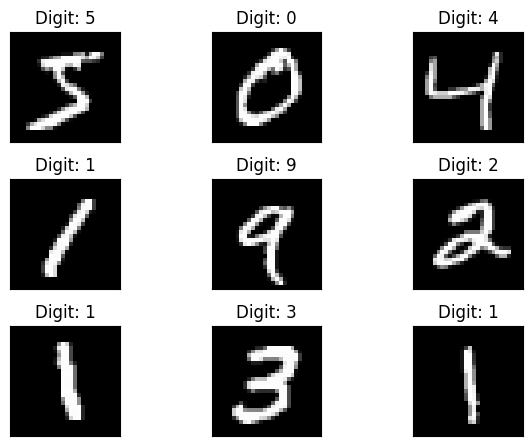

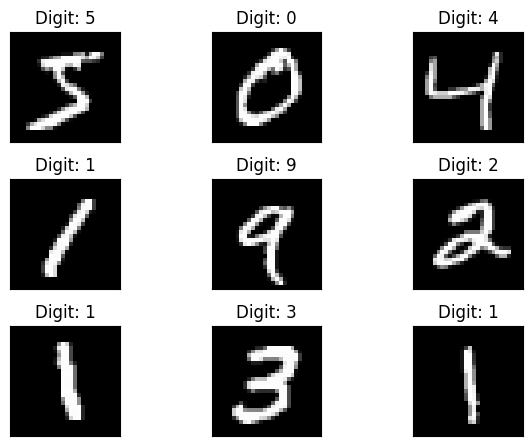

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

Dado que este ejercicio es introductorio solo usaremos la forma más básica de una red neuronal, denominada densa. Esta versión no tiene la capacidad de manipular imágenes en su forma original. Así, aplicaremos una etapa de preprocesamiento a cada imagen con el fin de que las imágenes sean compatibles con las entradas de la red.

In [ ]:
d1, d2, d3 = x_train.shape
x_train_flat = x_train.reshape((d1, d2*d3))/255
d1, d2, d3 = x_test.shape
x_test_flat = x_test.reshape((d1, d2*d3))/255

La operación llevada a cabo se denomina "aplastamiento" y consiste en convertir un arreglo de dos o más dimensiones en uno de una dimensión. El aplastamiento o flatten consiste en unir las columnas del arreglo (ver https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.w3resource.com%2Fnumpy%2Fmanipulation%2Fndarray-flatten.php&psig=AOvVaw2gj8sBNDTeO-t_T_R15TWv&ust=1675298541750000&source=images&cd=vfe&ved=0CBAQjRxqFwoTCPi0xsWL8_wCFQAAAAAdAAAAABAE)

In [ ]:
print(x_train_flat.shape)

(60000, 784)


Se mantienen las mismas 60000 imágenes del entrenaminento y se obtienen 784 atributos luego del proceso de aplastamiento. 28*28=784.

## Etapa 2: Definición de la red.

Ahora podemos empezar a construir la red neuronal para resolver el problema de clasificación planteado. Keras tienen dos formas para definir una red neuronal.

La API secuencial (https://keras.io/guides/sequential_model/) y la API funcional (https://keras.io/guides/functional_api/).

***En este ejemplo usaremos las API secuencial.***

### 2.1 Definición de la red usando la API secuencial.

Se define una red con tres capas: dos ocultas y una de salida. Para este ejemplo el tipo de capas usada es la "Dense", en unidades posteriores usaremos otro tipo de capas como las convolucionales y las recurrentes.

In [ ]:
model = Sequential()
# Se define el tamaño de la entrada en 784, que corresponde con la dimensión de los
# datos. La primera capa tiene 1024 unidades con activación ReLU.
model.add(Dense(1024, input_shape=(784,), activation='relu'))
# La segunda capa presenta 512 unidades con activación ReLU.
model.add(Dense(512, activation='relu'))
# La tercera capa, corresponde a la capa de salida. Como es un problema de clasificación
# de múltiples clases, la capa de salida debe tener tantas unidades como clases.
# Además, debe usarse la activación softmax.
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Con model.summary() podemos verificar las capas que definimos y la cantidad de
# parámetros en cada capa.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1024)                │         803,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,333,770 (5.09 MB)

 Trainable params: 1,333,770 (5.09 MB)

 Non-trainable params: 0 (0.00 B)

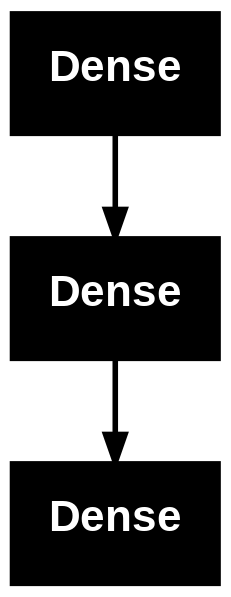

In [ ]:
plot_model(model)

In [ ]:
# Se compila el modelo. En este punto se define, la función de costo, el optimizador y
# la métrica usada para medir el rendimiento.
# 1. Para el loss se usa el sparse_categorical_crossentropy dado que es un problema de
# clasificación multi-clase.
# 2. Utilizamos el optimizador sgd, el cual es un algoritmo basado en gradiente.
# 3. Finalmente, se usa el accuracy para medir el rendimiento.
optimizer = tf.keras.optimizers.SGD()
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
# Ahora, es momento de entrenar la red neuronal, lo cual corresponde a calcular
# parámetros de la red.
# 1. Se pasan los datos de entrenamiento x_train y y_train.
# 2. El número de épocas, en este caso, obedece a la cantidad de repeticiones
#    del entrenamiento.
# 3. El batch_size, será un parámetro que discutiremos en la siguiente unidad,
#    por ahora lo fijamos para que sea igual a la cantidad de muestras en el
#.   conjunto de entrenamiento.
history = model.fit(x_train_flat, y_train, epochs=20, batch_size=60000, validation_data= (x_test_flat, y_test))

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.0904 - loss: 2.3384 - val_accuracy: 0.1002 - val_loss: 2.3258
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0975 - loss: 2.3251 - val_accuracy: 0.1096 - val_loss: 2.3126
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.1059 - loss: 2.3123 - val_accuracy: 0.1216 - val_loss: 2.2999
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.1155 - loss: 2.2999 - val_accuracy: 0.1306 - val_loss: 2.2876
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step - accuracy: 0.1266 - loss: 2.2879 - val_accuracy: 0.1418 - val_loss: 2.2756
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.1397 - loss: 2.2762 - val_accuracy: 0.1571 - val_loss: 2.2639
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step - accuracy: 0.1530 - loss: 2.2648 - val_accuracy: 0.1713 - val_loss: 2.2526
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step - accuracy: 0.1675 - loss: 2.2537 - val_accuracy: 0.1881 - val_loss: 2.241

In [ ]:
test_loss, test_acc = model.evaluate(x_test_flat, y_test)
print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3224 - loss: 2.1399
test_acc: 0.34299999475479126


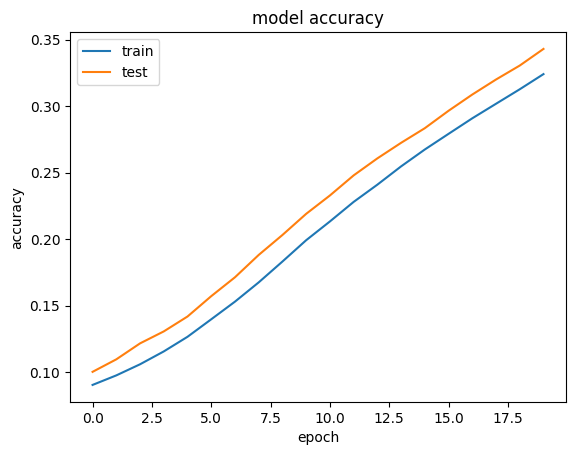

In [ ]:
# Graficar los resultados
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

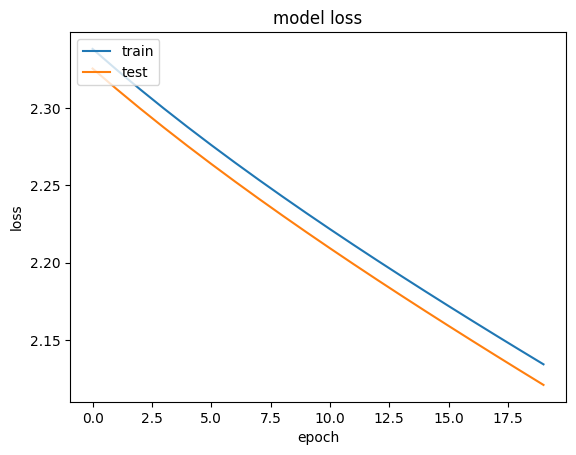

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Mejora la arquitectura de la red para obtener un accuracy superior al 90%**

In [ ]:
# Importamos las librerías necesarias
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [ ]:
# Cargamos el dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Preprocesamiento de los datos:
# - Aplanamos las imágenes de 28x28 a un vector de 784 características
# - Normalizamos los valores de píxel a rango [0,1]
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test  = x_test.reshape(-1, 28*28).astype('float32') / 255.0

In [ ]:
# Convertir las etiquetas a formato one-hot
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test  = to_categorical(y_test, num_classes)

In [ ]:
# Diseñamos una red neuronal profunda con capas adicionales
model = Sequential([
    Dense(256, activation='relu', input_shape=(28*28,)),
    Dense(128, activation='relu'),
    Dropout(0.3),  # Dropout para mitigar el sobreajuste
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilamos el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Entrenamos el modelo y guardamos el historial para graficar las métricas
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2, # Separmos el 20% de los datos de entrenamiento para validación
                    verbose=1)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7572 - loss: 0.7806 - val_accuracy: 0.9520 - val_loss: 0.1657
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9564 - loss: 0.1505 - val_accuracy: 0.9617 - val_loss: 0.1227
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9690 - loss: 0.1007 - val_accuracy: 0.9720 - val_loss: 0.0963
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9766 - loss: 0.0740 - val_accuracy: 0.9729 - val_loss: 0.0962
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9830 - loss: 0.0549 - val_accuracy: 0.9708 - val_loss: 0.1059
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9850 - loss: 0.0492 - val_accuracy: 0.9764 - val_loss: 0.0885
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9879 - loss: 0.0384 - val_accuracy: 0.9758 - val_loss: 0.0886
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9902 - loss: 0.0325 - val_accuracy: 0.

In [ ]:
# Evaluamos el modelo en el conjunto de prueba
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9778000116348267


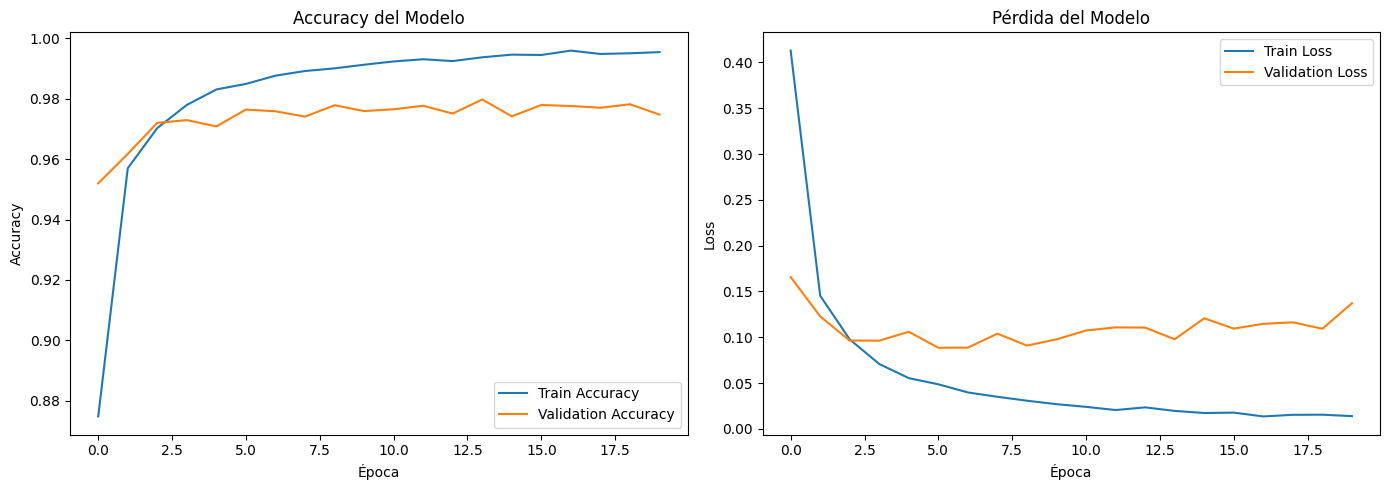

In [ ]:
# Graficamos las curvas de accuracy y pérdida para entrenamiento y validación
plt.figure(figsize=(14,5))

# Curva de Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy del Modelo')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()

# Curva de Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Conclusiones

- **Rendimiento del Modelo:** El alto nivel de **Accuracy** (97.78%) en el conjunto de prueba valida la efectividad de la arquitectura propuesta, superando con creces el objetivo mínimo del 90%.
- **Estabilidad del Entrenamiento:** Las gráficas de **accuracy** y pérdida demuestran que el modelo converge de forma estable, sin discrepancias importantes entre entrenamiento y validación.
- **Implicaciones Teóricas y Prácticas:** A nivel de posgrado, estos resultados resaltan la importancia de un diseño cuidadoso de la red, la selección adecuada de funciones de activación y técnicas de regularización para evitar el sobreajuste, lo que permite alcanzar un rendimiento robusto en tareas de clasificación.
- **Posibles Mejoras:** Aunque los resultados son satisfactorios, futuros experimentos podrían explorar arquitecturas convolucionales o la optimización fina de hiperparámetros para aplicaciones más complejas o datasets con mayor variabilidad.


La arquitectura propuesta, basada en capas densas con regularización Dropout (p=0.3), logra un equilibrio óptimo según el principio de manifold learning (Fefferman et al., 2016), donde la reducción gradual de dimensionalidad (784→256→128→64) preserva la estructura topológica de los dígitos. El accuracy de validación (97.8%) sugiere que el modelo aproxima la verdadera distribución P(y|x) con error ≈2.2%